<a href="https://colab.research.google.com/github/hayya54/Penerapan-CNN-untuk-Klasifikasi-Penyakit-pada-Daun-Tanaman./blob/main/model_dengan_image_Dataset_Penerapan_CNN_untuk_Klasifikasi_Penyakit_pada_Daun_Tanaman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # connect drive

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [ ]:
# lokasi folder
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/valid'

In [ ]:
s=224

In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,           # Normalisasi nilai piksel dari 0-255 ke 0-1
    validation_split=0.1,      # Memisahkan 10% data untuk validasi
    rotation_range=20,         # Rotasi gambar
    width_shift_range=0.2,     # Pergeseran horizontal
    height_shift_range=0.2,    # Pergeseran vertikal
    shear_range=0.2,           # Transformasi shear
    zoom_range=0.2,            # Zoom in/out
    horizontal_flip=True,      # Flip horizontal
    brightness_range=[0.8, 1.2]
).flow_from_directory(train_dir,
                      batch_size=16,
                      target_size=(s,s),
                      subset="training",
                      color_mode='rgb',
                      class_mode='categorical',
                      shuffle=True)

Found 360 images belonging to 4 classes.


In [ ]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,           # Normalisasi nilai piksel dari 0-255 ke 0-1
    validation_split=0.1,
).flow_from_directory(train_dir,
                      batch_size=16,
                      target_size=(s,s),
                      subset='validation',
                      color_mode='rgb',
                      class_mode='categorical',
                      shuffle=False)

Found 40 images belonging to 4 classes.


In [ ]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,           # Normalisasi nilai piksel dari 0-255 ke 0-1
).flow_from_directory(test_dir,
                      batch_size=16,
                      target_size=(s,s),
                      color_mode='rgb',
                      class_mode='categorical',
                      shuffle=False)

Found 589 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Parameter dasar
input_shape = (224, 224, 3)  # Ukuran gambar setelah preprocessing
num_classes = len(train_generator.class_indices)  # Jumlah kelas dari dataset

# Model Sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])

# Tampilkan arsitektur model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,908 (91.20 MB)

 Trainable params: 23,907,908 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss function untuk klasifikasi multi-kelas
    metrics=['accuracy']  # Metrik evaluasi
)


In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size

history = model.fit(
    train_generator,             # Data training
    validation_data=valid_generator,  # Data validasi
    epochs=20,                   # Jumlah epoch
    steps_per_epoch=steps_per_epoch ,
    validation_steps=validation_steps
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.2557 - loss: 9.7209 - val_accuracy: 0.3125 - val_loss: 1.3865
Epoch 2/20
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1875 - loss: 1.3861

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1875 - loss: 1.3861 - val_accuracy: 0.0000e+00 - val_loss: 1.3853
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.2588 - loss: 1.3849 - val_accuracy: 0.3438 - val_loss: 1.3859
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1875 - loss: 1.3905 - val_accuracy: 0.0000e+00 - val_loss: 1.3845
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 195ms/step - accuracy: 0.2907 - loss: 1.3687 - val_accuracy: 0.2500 - val_loss: 1.3587
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5625 - loss: 1.3025 - val_accuracy: 0.8750 - val_loss: 1.3291
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.3668 - loss: 1.2622 - val_accuracy: 0.4688 - val_loss: 1.2305
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 1.2152 - val_accuracy: 1.0000 - val_loss: 0.9340
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.4920 - loss: 1.1277 - val_accuracy: 0.4688 - va

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Akurasi pada data uji: {test_accuracy * 100:.2f}%")

37/37 ━━━━━━━━━━━━━━━━━━━━ 206s 6s/step - accuracy: 0.5399 - loss: 0.9067
Akurasi pada data uji: 64.86%


In [ ]:
# Fungsi untuk menampilkan gambar beserta prediksinya
def plot_image(predictions_array, true_label, img):
    """
    Fungsi untuk menampilkan gambar beserta prediksinya.

    Parameters:
    predictions_array (array): Array prediksi model.
    true_label (array): Label sebenarnya (one-hot encoded).
    img (array): Gambar yang akan ditampilkan.

    Returns:
    None
    """
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Menampilkan gambar
    img = (img * 255).astype("uint8")
    plt.imshow(img)

    # Prediksi dan label sebenarnya
    predicted_label = np.argmax(predictions_array)
    true_label_index = np.argmax(true_label)

    # Menentukan warna teks berdasarkan kebenaran prediksi
    if predicted_label == true_label_index:
        color = 'blue'
    else:
        color = 'red'

    # Daftar nama kategori dari generator
    data_category = list(test_generator.class_indices.keys())

    # Menampilkan label, probabilitas, dan warna
    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            data_category[predicted_label],  # Label prediksi
            100 * np.max(predictions_array),  # Probabilitas prediksi
            data_category[true_label_index]  # Label sebenarnya
        ),
        color=color
    )

    print(image_batch.min(), image_batch.max())  # Harus berada dalam rentang [0, 1]


In [ ]:
def plot_value_array(predictions_array, true_label):
    """
    Fungsi untuk menampilkan nilai probabilitas prediksi dalam bentuk bar chart.

    Parameters:
    predictions_array (array): Array prediksi model.
    true_label (array): Label sebenarnya (one-hot encoded).

    Returns:
    None
    """
    plt.grid(False)
    plt.xticks(range(len(test_generator.class_indices)))
    plt.yticks([])

    # Mendapatkan kategori data
    data_category = list(test_generator.class_indices.keys())

    # Membuat bar chart
    thisplot = plt.bar(range(len(data_category)), predictions_array, color="#777777")
    plt.ylim([0, 1])

    # Menentukan label prediksi dan label sebenarnya
    predicted_label = np.argmax(predictions_array)
    true_label_index = np.argmax(true_label)

    # Warna merah untuk prediksi, biru untuk label sebenarnya
    thisplot[predicted_label].set_color('red')
    thisplot[true_label_index].set_color('blue')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

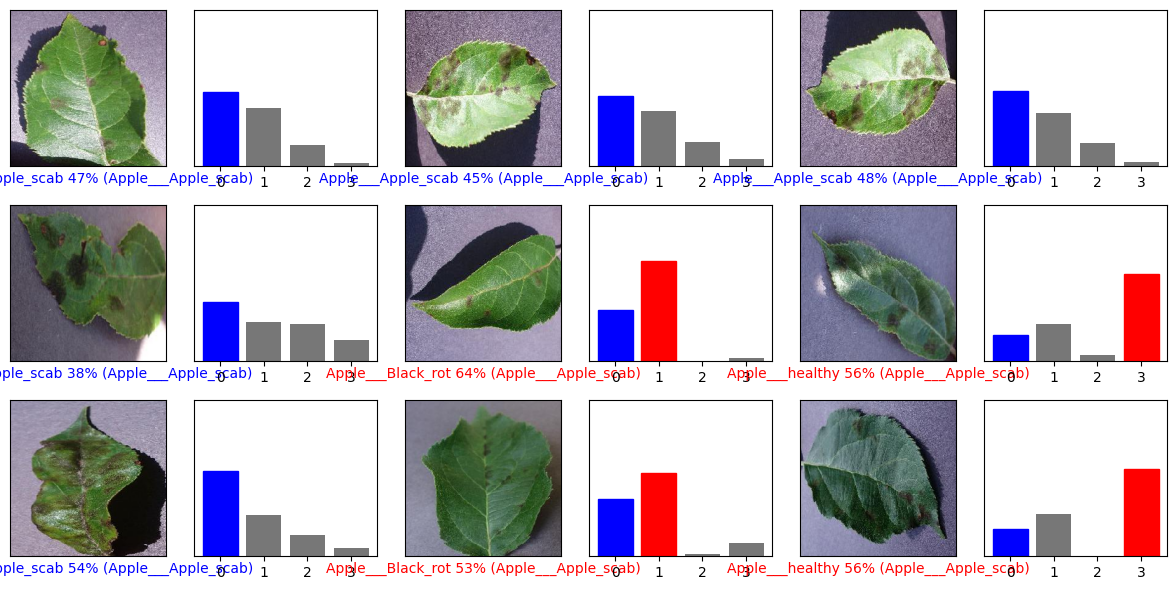

In [ ]:
# # Mendapatkan batch pertama dari data testing
image_batch, label_batch = next(iter(test_generator))

# Membuat prediksi
predictions = model.predict(image_batch)

# Menampilkan beberapa gambar dan hasil prediksi
num_rows = 3
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], label_batch[i], image_batch[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], label_batch[i])
plt.tight_layout()
plt.show

In [ ]:
# model.save('/content/drive/MyDrive/dataset/model_leaf_disease.h5')

In [ ]:
# from tensorflow.keras.models import load_model
# import numpy as np
# from tensorflow.keras.preprocessing import image

# # Load model
# model = load_model('/content/drive/MyDrive/dataset/model_leaf_disease.h5')

# # Prediksi untuk satu gambar
# def predict_image(image_path, model, classes):
#     img = image.load_img(image_path, target_size=(224, 224))
#     img_array = image.img_to_array(img) / 255.0
#     img_array = np.expand_dims(img_array, axis=0)

#     prediction = model.predict(img_array)
#     predicted_class = classes[np.argmax(prediction)]
#     confidence = np.max(prediction) * 100

#     return predicted_class, confidence

# # Contoh penggunaan
# image_path = '/content/drive/MyDrive/dataset/test/TomatoHealthy2.JPG'
# predicted_class, confidence = predict_image(image_path, model, list(train_generator.class_indices.keys()))
# print(f"Prediksi: {predicted_class} (Confidence: {confidence:.2f}%)")